# <b>Milestone 1

## Conspectus
Plasmodium parasite is a well known infectious disease that impacts young children especially. Approximately 229 million people are infected every year and 400,000 result in death. The plasmodium parasite is commonly known as malaria and 50% of the worlds' population is at risk of contracting the disease. Children under age 5 are at most risk, whose population accounts for 67% of all deaths worldwide. 
*** ***
#### **Objective** 
Build an automated classification technique to identify infected red blood cells (RBCs). Images of infected RBCs (erythrocytes) display the presence of plasmodium parasite, which disrupts oxygen delivery to the host. The dataset contains images in two categories: 
- **parasitized** erythrocytes.
- **uninfected** erythrocytes.

There are a total of 24,958 train and 2,600 test images (colored).

### Exploratory Data Analysis

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing libraries required to load the data
import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# set style of plots for whole document & color palette
plt.style.use('fivethirtyeight')
custom_palette = ['#5D6D7E']
custom_palette_binary = ['#5DADE2','#34495E']

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

In [ ]:
# Load data
path = '/content/drive/MyDrive/cell_images.zip'

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
train_dir = '/content/drive/MyDrive/cell_images/train'

SIZE = 64
train_images = []
train_labels = []

for folder_name in ['/parasitized/', '/uninfected/']:
  images_path = os.listdir(train_dir + folder_name)
  for i, image_name in enumerate(images_path):
    try: 
      image = Image.open(train_dir + folder_name + image_name)
      image = image.resize((SIZE, SIZE))
      train_images.append(np.array(image))
      if folder_name == '/parasitized/':
        train_labels.append(1)
      else:
        train_labels.append(0)
    except Exception:
      pass
  
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [4]:
test_dir = '/content/drive/MyDrive/cell_images/test'

SIZE = 64
test_images = []
test_labels = []

for folder_name in ['/parasitized/', '/uninfected/']:
  images_path = os.listdir(test_dir + folder_name)
  for i, image_name in enumerate(images_path):
    try:
      image = Image.open(test_dir + folder_name + image_name)
      image = image.resize((SIZE, SIZE))
      test_images.append(np.array(image))
      if folder_name == '/parasitized/':
        test_labels.append(1)
      else: 
        test_labels.append(0)
    except Exception:
        pass

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [5]:
# New shape 
print('Training set:', train_images.shape, train_labels.shape)
print('Test set:',test_images.shape, test_labels.shape)

Training set: (24958, 64, 64, 3) (24958,)
Test set: (2600, 64, 64, 3) (2600,)


**Observations:**
- The shape of the images is 64x64 and are colored images.
- The labels are totaled 24,958 and 2600 for both train and test sets, respectively.

In [6]:
print('The maximum and minimum value for the train: ', np.max(train_images), np.min(train_images))
print('The maximum and minimum value for the test: ', np.max(test_images), np.min(test_labels))

The maximum and minimum value for the train:  255 0
The maximum and minimum value for the test:  255 0


**Observations:**
- the range of pixel values is [0,255]. This covers the range of values for colored images. 

In [7]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = train_images.astype('float32')/255.
test_images = test_images.astype('float32')/255.

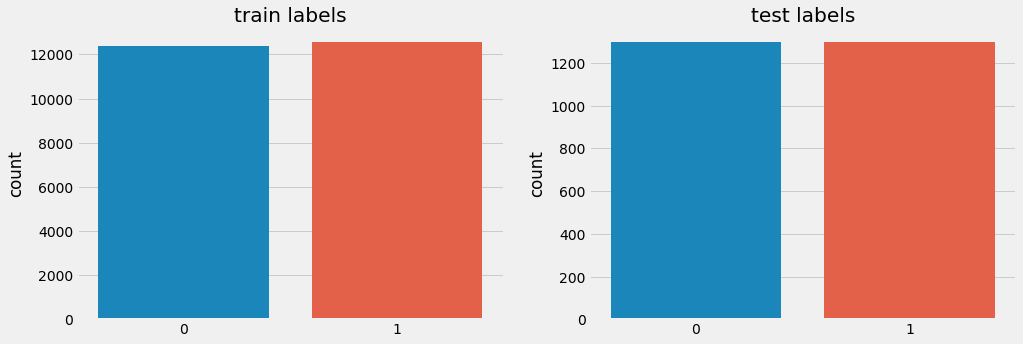

In [8]:
# Countplot plot
plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([train_labels , test_labels] , ['train labels','test labels']):
    n += 1
    plt.subplot(1 , 2  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

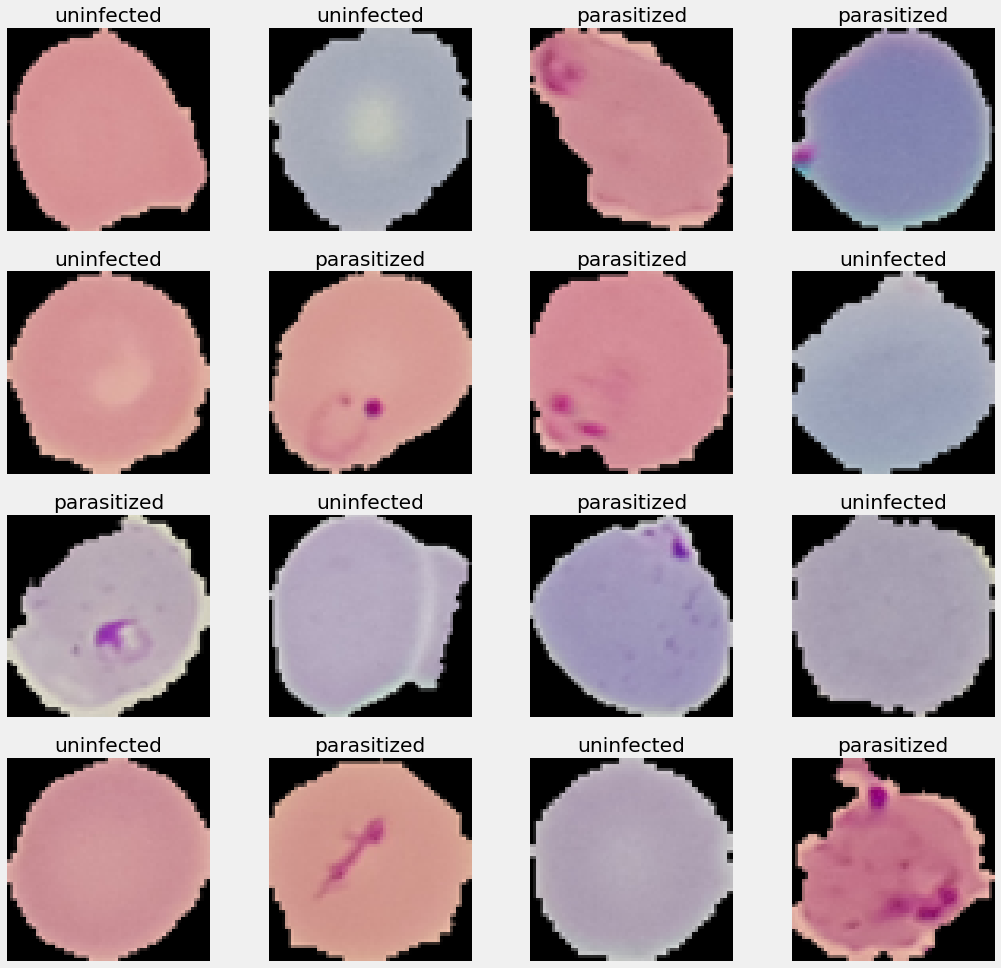

In [18]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))
for n in range(1, 17):
    plt.subplot(4, 4, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')

###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

In [ ]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate


In [19]:
# Function to find the mean
def find_mean_img(full_mat, title):
    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]
    # Reshape it back to a matrix
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()

    return mean_img

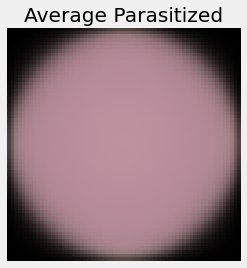

In [20]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):
        if label == 1:
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

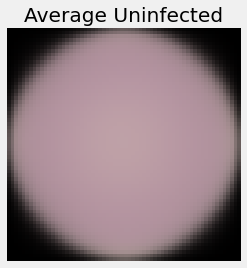

In [29]:
# Similarly write the code to find the mean image of uninfected
uninfected_data = []
for img, label in zip(train_images, train_labels):
  if label == 0:
    uninfected_data.append([img])
uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')

In [21]:
import cv2
gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):
  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  gfx.append(a)

gfx = np.array(gfx)

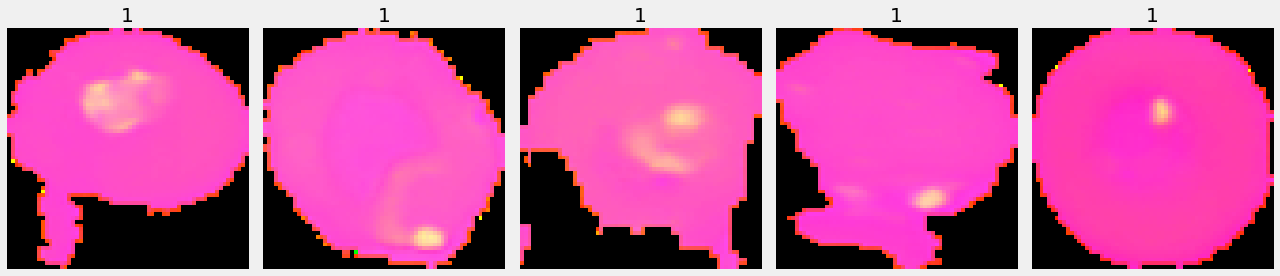

In [22]:
viewimage = np.random.randint(1, 100, 5)
fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):
  Title = train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

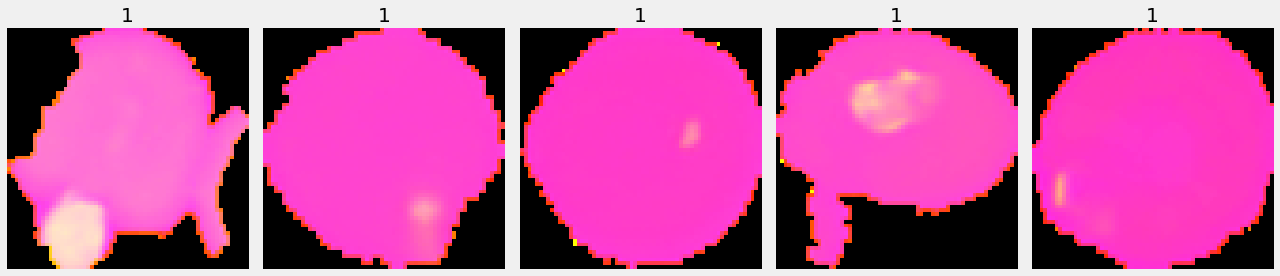

In [27]:
# Similarly you can visualize for the images in the test data
viewimage = np.random.randint(1, 100, 5)
fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):
  Title = test_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

In [23]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):
  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)
  gbx.append(b)

gbx = np.array(gbx)

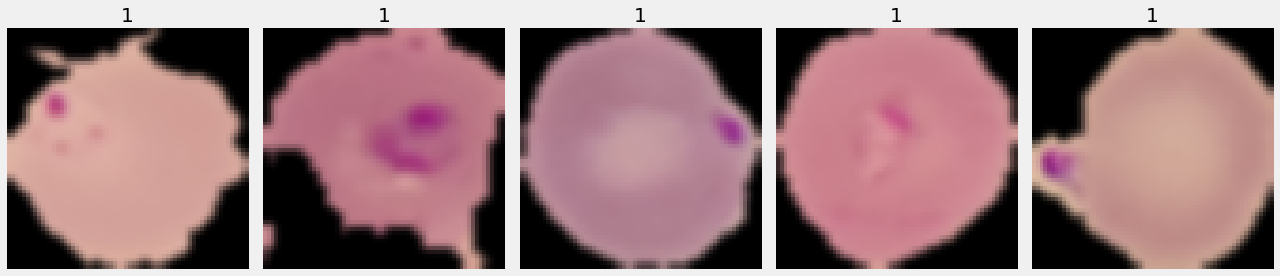

In [24]:
viewimage = np.random.randint(1, 100, 5)
fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):
  Title = train_labels[i]
  ax[t].set_title(Title)  
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

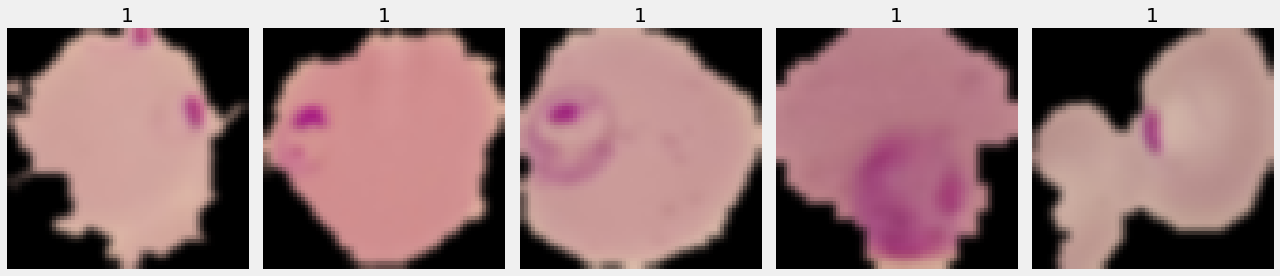

In [28]:
# Similarly you can apply Gaussian blurring for the images in the test data
viewimage = np.random.randint(1, 100, 5)
fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):
  Title = test_labels[i]
  ax[t].set_title(Title)  
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####**Observations and insights: _____**

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

It is possible blurring can distribute over a greater spatial range the parasite of infected erythrocyte images, but what other 'mask' we may apply I cannot say for sure. A drawback is that some images may have too broad of a distribution of the parasite, which may result in misclassification if the spreads on a majority of images is small. So you may attempt a blurring with Gaussians or Lorentzians, say, and without to observe and influence on the model. Or perhaps the full-width at half-max (FWHM) should be analyzed carefully to observe any possible relationship with the predictions from the model... 

## **Proposed approach**

**Potential techniques:** What different techniques should be explored?<br>
**Overall solution design:** What is the potential solution design?<br>
**Measures of success:** What are the key measures of success to compare different techniques?<br>

- The technique we will apply is a convolutoinal neural network (CNN). CNNs are capable of learning spatial structures of an image and can be computationally less demanding. Hence, the parasitized images display the presence of the parasite, while the uninfected should have featureless (compared to the infected) images or healthy erythrocytes. 
- For feature extraction we will construct a CNN sequentially, with multiple filter (128, 64, etc.) layers, pooling layers, either ReLU or sigmoid activation functions (coudl test this), dopout function, and Adam or SGD optimizer(s). The loss function we apply will be categorical_crossentropy and the metrix will be 'accuracy.'
- We will also determine the confusion matrix and 'accuracy' vs epoch of the results to determine the success of the classification of the images. If overfitting is avoided and test validation accuracy 'tracks' well with the train accuracy we should anticipate the confusion matrix to have low misclassification.     

### Note: If the model does not perform well, then ANN or even GNN may be attempted. It is also possible the data scientist may simply build and run these models to estimate effect. 